# **Part 4: Insights on numerical factors**
---

In this section, we will be analysing numerical factors that can influence the success of a movie and determine if it is an infuential factor <br>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set() 

### Initialising factors

In [2]:
success_data = pd.read_pickle('success.pkl')
popularity_data = success_data[['popularity']]
profit_data = success_data[['profit']]
factors = pd.read_pickle('factors.pkl')
budget = pd.DataFrame(factors['budget']).sort_values(by = "budget", ascending = False)
runtime = pd.DataFrame(factors['runtime'])

### Comparing *budget* and *popularity*

Comparison is done through a scatterplot and regression is done to find the best linear relationship between the variables that can be used to make predictions and to understand the relationship between them.

In [3]:
jointDF = pd.concat([budget, popularity_data], axis = 1)
jointDF

,budget,popularity
404,425000000.0,0.250540
537,380000000.0,4.955130
1078,300000000.0,4.965391
14,280000000.0,5.944927
757,260000000.0,1.588457
...,...,...
275,75.0,0.278387
710,68.0,0.958182
1268,30.0,1.072912
412,3.0,0.028456


<AxesSubplot:xlabel='budget', ylabel='popularity'>

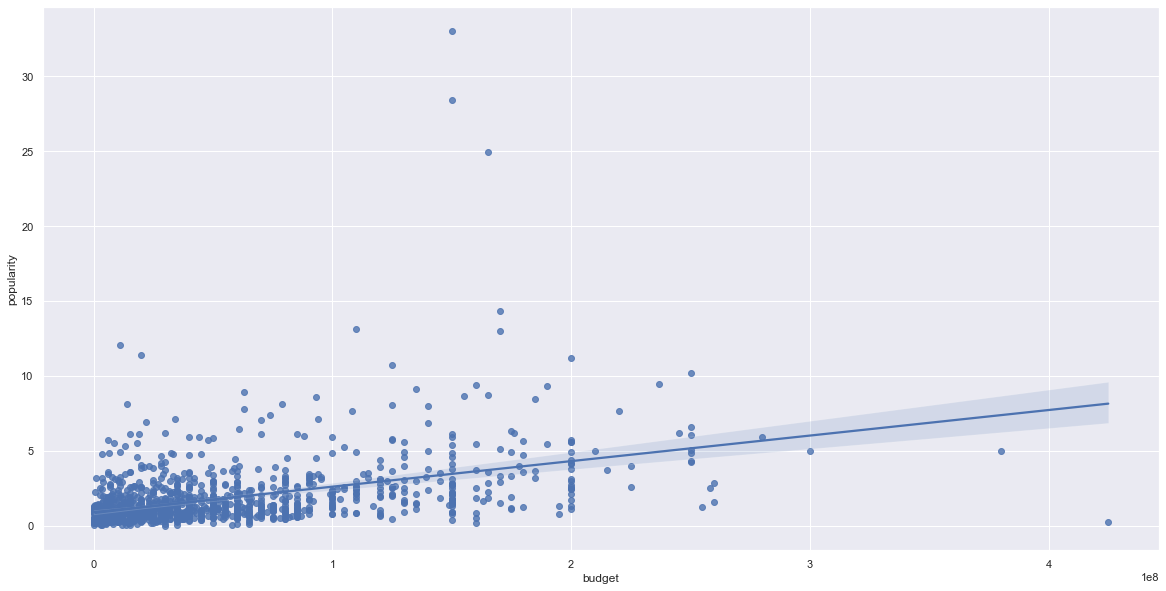

In [4]:
plt.figure(figsize=(20, 10))

sb.regplot(x="budget", y="popularity", data=jointDF)


In [5]:
jointDF.corr()

,budget,popularity
budget,1.000000,0.432791
popularity,0.432791,1.000000


### Comparing *budget* and *profit*


In [6]:
jointDF2 = pd.concat([budget, profit_data], axis = 1).reindex(budget.index)
jointDF2

,budget,profit
404,425000000.0,-4.139124e+08
537,380000000.0,6.416830e+08
1078,300000000.0,6.610000e+08
14,280000000.0,1.125036e+09
757,260000000.0,2.413910e+07
...,...,...
275,75.0,5.900000e+01
710,68.0,1.250000e+02
1268,30.0,1.700000e+02
412,3.0,4.000000e+01


<AxesSubplot:xlabel='budget', ylabel='profit'>

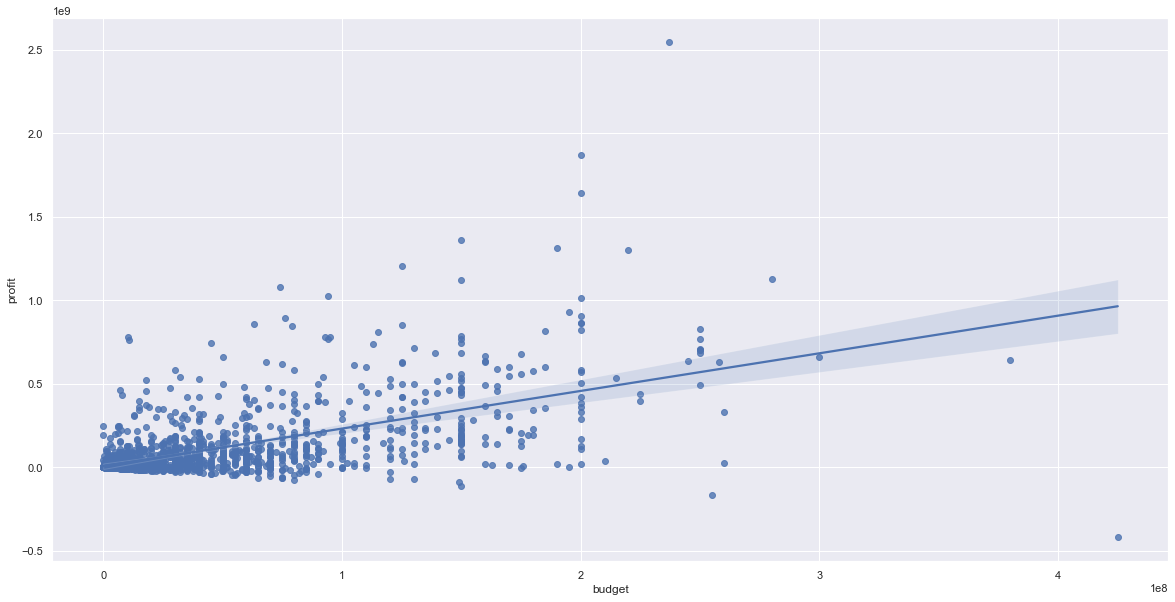

In [7]:
plt.figure(figsize=(20, 10))

sb.regplot(x="budget", y="profit", data=jointDF2)

In [8]:
jointDF2.corr()

,budget,profit
budget,1.00000,0.56916
profit,0.56916,1.00000


### Comparing *runtime* and *popularity*


In [9]:
jointDF3 = pd.concat([runtime, popularity_data], axis = 1).reindex(budget.index)
jointDF3

,runtime,popularity
404,100,0.250540
537,136,4.955130
1078,169,4.965391
14,141,5.944927
757,132,1.588457
...,...,...
275,129,0.278387
710,124,0.958182
1268,134,1.072912
412,87,0.028456


<AxesSubplot:xlabel='runtime', ylabel='popularity'>

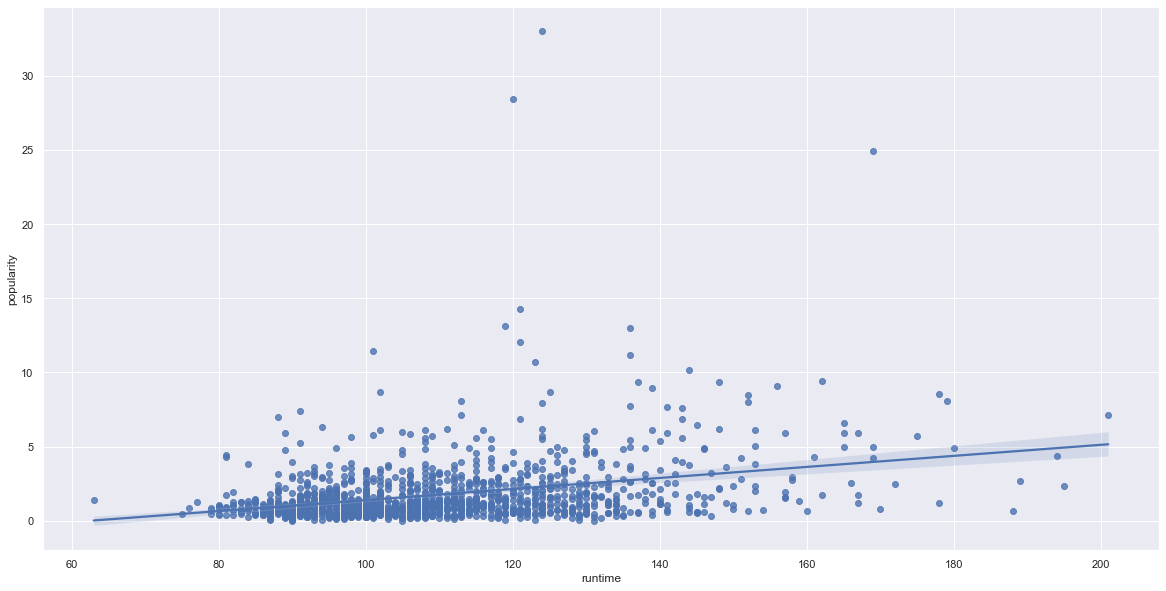

In [10]:
plt.figure(figsize=(20, 10))

sb.regplot(x="runtime", y="popularity", data=jointDF3)

In [11]:
jointDF3.corr()

,runtime,popularity
runtime,1.00000,0.32239
popularity,0.32239,1.00000


### Comparing *runtime* and *profit*


In [12]:
jointDF4 = pd.concat([runtime, profit_data], axis = 1).reindex(budget.index)
jointDF4

,runtime,profit
404,100,-4.139124e+08
537,136,6.416830e+08
1078,169,6.610000e+08
14,141,1.125036e+09
757,132,2.413910e+07
...,...,...
275,129,5.900000e+01
710,124,1.250000e+02
1268,134,1.700000e+02
412,87,4.000000e+01


<AxesSubplot:xlabel='runtime', ylabel='profit'>

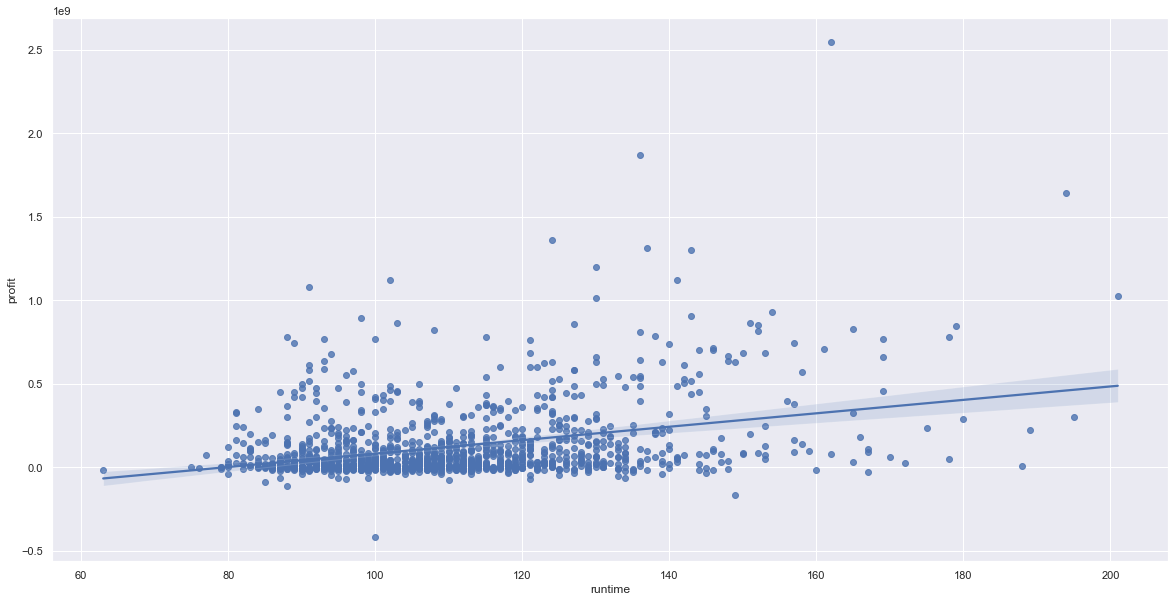

In [13]:
plt.figure(figsize=(20, 10))

sb.regplot(x="runtime", y="profit", data=jointDF4)

In [14]:
jointDF4.corr()

,runtime,profit
runtime,1.000000,0.346323
profit,0.346323,1.000000


---
## Random forest classification 

We will be plotting the decision tree for the respective factors which will be optimised for the highest classfication accuracy to predict whether a movie is successful based on the provided data. <br>

We have defined that a movie is profitable and popular if it is in the top 25% of the movies in the dataset

In [15]:
popularity_threshold = success_data[['popularity']].quantile(0.75)
success_data[['popular?']] = success_data[['popularity']] >= popularity_threshold
profit_threshold = success_data[['profit']].quantile(0.75)
success_data[['profitable?']] = success_data[['profit']] >= profit_threshold
success_data



,popularity,profit,popular?,profitable?
0,32.985763,1.363529e+09,True,True
1,28.419936,2.284364e+08,True,True
2,13.112507,1.852382e+08,True,True
3,11.173104,1.868178e+09,True,True
4,9.335014,1.316249e+09,True,True
...,...,...,...,...
1282,1.549139,1.547778e+08,False,True
1283,1.910465,1.301957e+08,False,False
1284,1.778746,7.497449e+07,False,False
1285,1.198849,6.970000e+07,False,False


In [16]:
jointDF5 = pd.concat([success_data, budget, runtime], axis = 1).reindex(budget.index)
jointDF5

,popularity,profit,popular?,profitable?,budget,runtime
404,0.250540,-4.139124e+08,False,False,425000000.0,100
537,4.955130,6.416830e+08,True,True,380000000.0,136
1078,4.965391,6.610000e+08,True,True,300000000.0,169
14,5.944927,1.125036e+09,True,True,280000000.0,141
757,1.588457,2.413910e+07,False,False,260000000.0,132
...,...,...,...,...,...,...
275,0.278387,5.900000e+01,False,False,75.0,129
710,0.958182,1.250000e+02,False,False,68.0,124
1268,1.072912,1.700000e+02,False,False,30.0,134
412,0.028456,4.000000e+01,False,False,3.0,87


In [17]:
budget = pd.DataFrame(jointDF5['budget'])
runtime = pd.DataFrame(jointDF5['runtime'])
popular = pd.DataFrame(jointDF5['popular?'])
profitable = pd.DataFrame(jointDF5['profitable?'])


/Users/liekzhewong/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='budget', ylabel='popular?'>

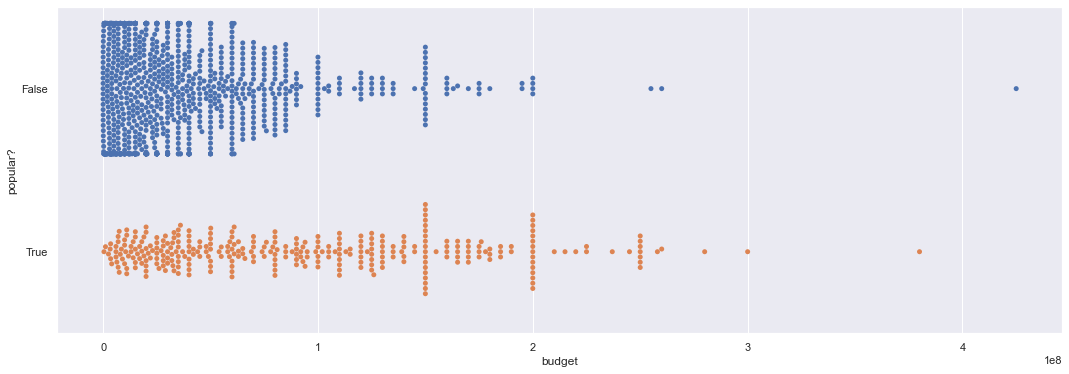

In [18]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "budget", y = "popular?", data = jointDF5, orient = "h")

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(budget, profitable, test_size = 0.2)
tree1 = DecisionTreeClassifier(max_depth= 5)    #* tree1 : max depth 5
tree1.fit(budget, popular)

f = plt.figure(figsize=(200,100))
plot_tree(tree1, filled=True, rounded=True, 
          feature_names=["budget"], 
          class_names=["No","Yes"])

[Text(0.5153061224489796, 0.9166666666666666, 'budget <= 87500000.0\ngini = 0.375\nsamples = 1287\nvalue = [965, 322]\nclass = No'),
 Text(0.22448979591836735, 0.75, 'budget <= 30750000.0\ngini = 0.269\nsamples = 1050\nvalue = [882, 168]\nclass = No'),
 Text(0.10204081632653061, 0.5833333333333334, 'budget <= 5500000.0\ngini = 0.209\nsamples = 632\nvalue = [557, 75]\nclass = No'),
 Text(0.04081632653061224, 0.4166666666666667, 'budget <= 350000.0\ngini = 0.087\nsamples = 153\nvalue = [146, 7]\nclass = No'),
 Text(0.02040816326530612, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]\nclass = No'),
 Text(0.061224489795918366, 0.25, 'budget <= 437500.0\ngini = 0.104\nsamples = 127\nvalue = [120, 7]\nclass = No'),
 Text(0.04081632653061224, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.08163265306122448, 0.08333333333333333, 'gini = 0.091\nsamples = 126\nvalue = [120, 6]\nclass = No'),
 Text(0.16326530612244897, 0.4166666666666667, 'budget <= 2950000

True Positive Rate 	: 0.4817813765182186
False Positive Rate 	: 0.056265984654731455
True Negative Rate 	: 0.9437340153452686
False Negative Rate 	: 0.5182186234817814
Classification Accuracy 	: 0.8328474246841594


<AxesSubplot:>

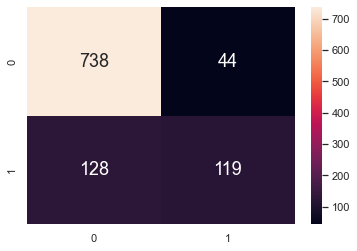

In [ ]:
train1_pred = tree1.predict(X1_train)

FP_TRAIN1 = confusion_matrix(y1_train, train1_pred)[0][1]
TP_TRAIN1 = confusion_matrix(y1_train, train1_pred)[1][1]
FN_TRAIN1 =confusion_matrix(y1_train, train1_pred)[1][0]
TN_TRAIN1 = confusion_matrix(y1_train, train1_pred)[0][0]
TPR_TRAIN1= (TP_TRAIN1)/(TP_TRAIN1+FN_TRAIN1)
FPR_TRAIN1 = (FP_TRAIN1)/(FP_TRAIN1+TN_TRAIN1)

print("True Positive Rate \t:", TPR_TRAIN1)
print("False Positive Rate \t:", FPR_TRAIN1)
print("True Negative Rate \t:", 1-FPR_TRAIN1)
print("False Negative Rate \t:", 1-TPR_TRAIN1)
# Print the Classification Accuracy
print("Classification Accuracy \t:", tree1.score(X1_train, y1_train))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y1_train, train1_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

/Users/liekzhewong/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='budget', ylabel='profitable?'>

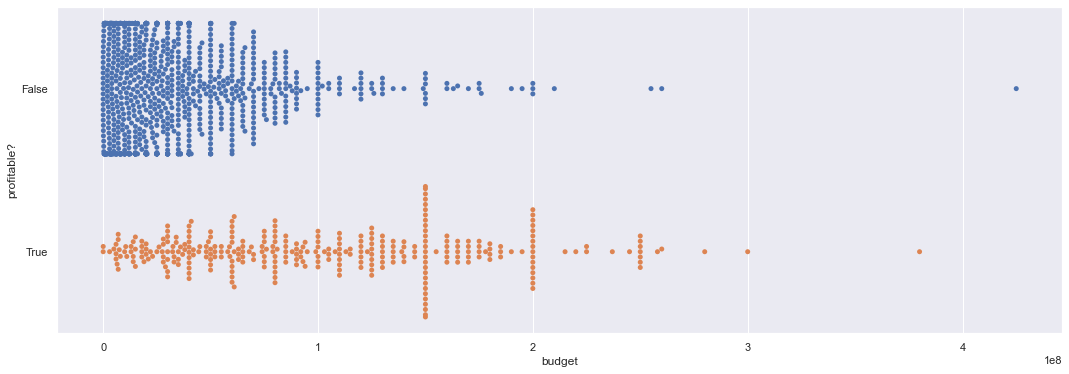

In [ ]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "budget", y = "profitable?", data = jointDF5, orient = "h")

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(budget, profitable, test_size = 0.2)
tree2 = DecisionTreeClassifier(max_depth= 5)    # tree1 : max depth 5
tree2.fit(X2_train, y2_train)

f = plt.figure(figsize=(20,20))

plot_tree(tree2, filled=True, rounded=True, 
          feature_names=["budget"], 
          class_names=["No","Yes"])

NameError: name 'train_test_split' is not defined

True Positive Rate 	: 0.4549019607843137
False Positive Rate 	: 0.04392764857881137
True Negative Rate 	: 0.9560723514211886
False Negative Rate 	: 0.5450980392156863
Classification Accuracy 	: 0.8318756073858115


<AxesSubplot:>

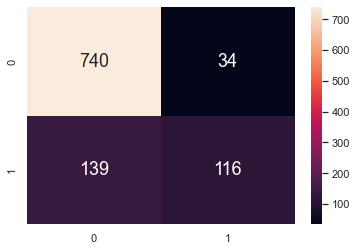

In [ ]:
train2_pred = tree2.predict(X2_train)

FP_TRAIN2 = confusion_matrix(y2_train, train2_pred)[0][1]
TP_TRAIN2 = confusion_matrix(y2_train, train2_pred)[1][1]
FN_TRAIN2 =confusion_matrix(y2_train, train2_pred)[1][0]
TN_TRAIN2 = confusion_matrix(y2_train, train2_pred)[0][0]
TPR_TRAIN2= (TP_TRAIN2)/(TP_TRAIN2+FN_TRAIN2)
FPR_TRAIN2 = (FP_TRAIN2)/(FP_TRAIN2+TN_TRAIN2)

print("True Positive Rate \t:", TPR_TRAIN2)
print("False Positive Rate \t:", FPR_TRAIN2)
print("True Negative Rate \t:", 1-FPR_TRAIN2)
print("False Negative Rate \t:", 1-TPR_TRAIN2)
# Print the Classification Accuracy
print("Classification Accuracy \t:", tree2.score(X2_train, y2_train))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y2_train, train2_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### *runtime*

<AxesSubplot:xlabel='runtime', ylabel='popular?'>

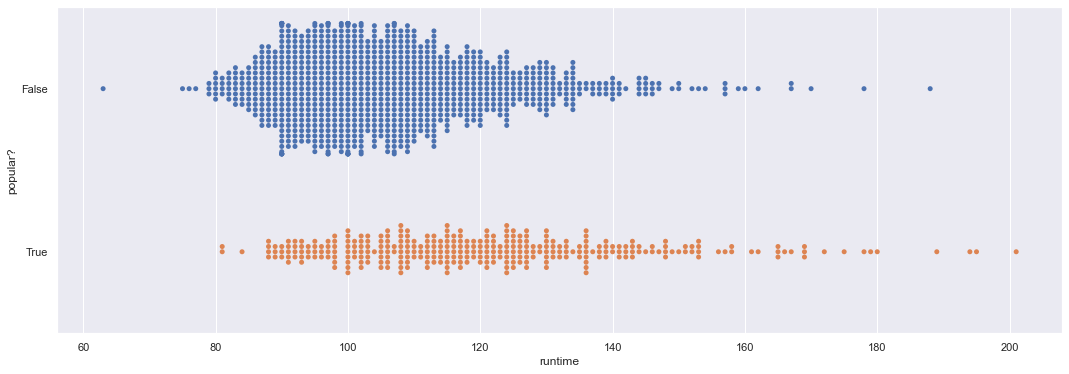

In [ ]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "runtime", y = "popular?", data = jointDF5, orient = "h")

<AxesSubplot:xlabel='runtime', ylabel='profitable?'>

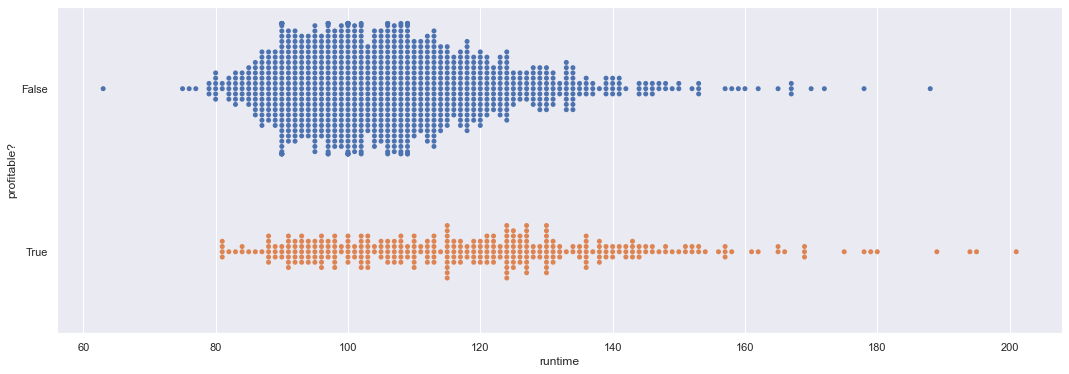

In [ ]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "runtime", y = "profitable?", data = jointDF5, orient = "h")